<a href="https://colab.research.google.com/github/naenumtou/dataScienceLab/blob/main/COVIDLogScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
%config InlineBackend.figure_format = 'retina' #Retina display
plt.style.use('seaborn-deep') #Plot style

In [3]:
# Import data
df = pd.read_csv(
    'https://raw.githubusercontent.com/naenumtou/dataScienceLab/main/datasets/hist_covid-19.csv'
)
df['date'] = pd.to_datetime(
    df['date'],
    dayfirst = True
) #Change format

# Show
df.head(5)

,country,date,cases
0,afghanistan,2020-01-22,0
1,afghanistan,2020-01-23,0
2,afghanistan,2020-01-24,0
3,afghanistan,2020-01-25,0
4,afghanistan,2020-01-26,0


In [4]:
# Find daily cases
df['dailyCases'] = df.groupby(
    ['country']
)['cases'].diff(1).fillna(df['cases'])

# Show
df.head(5)

,country,date,cases,dailyCases
0,afghanistan,2020-01-22,0,0.0
1,afghanistan,2020-01-23,0,0.0
2,afghanistan,2020-01-24,0,0.0
3,afghanistan,2020-01-25,0,0.0
4,afghanistan,2020-01-26,0,0.0


In [5]:
# Define plot function
def plotCases(data, title, country = True):
  plt.figure(figsize = (10, 6))
  if country is not True:
    huePara = None
  else:
    huePara = 'country'
  ax = sns.lineplot(
      x = 'cases',
      y = 'dailyCases',
      hue = huePara,
      data = data
  )
  ax.set_xscale(
      'log',
      basex = 10
  )
  ax.set_yscale(
      'symlog',
      basey = 10
  )
  plt.title(title)
  return plt.show()

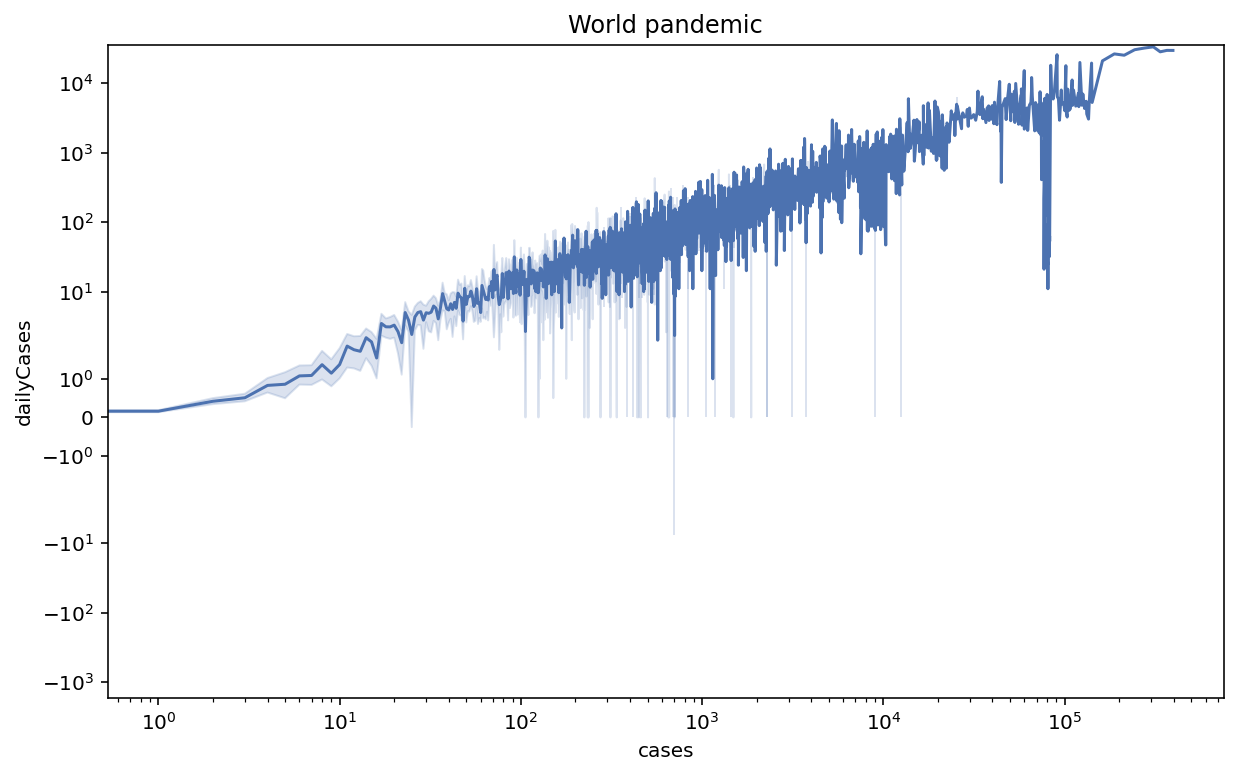

In [6]:
# Plot world pandemic
plotCases(df, 'World pandemic', country = False)

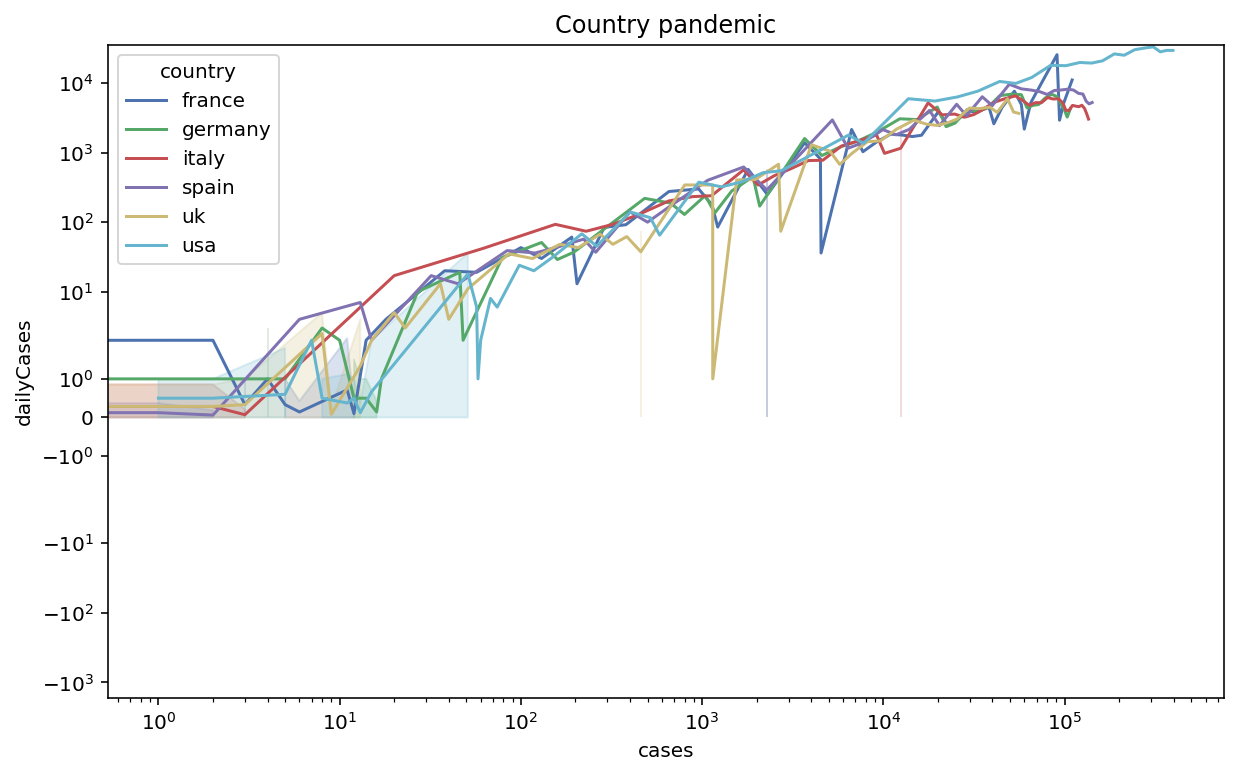

In [7]:
# Plot by countries
countries = ['italy', 'usa', 'uk', 'spain', 'uk', 'france', 'germany']
dfSelect1 = df[df['country'].isin(countries)]

# Plot
plotCases(dfSelect1, 'Country pandemic', country = True)

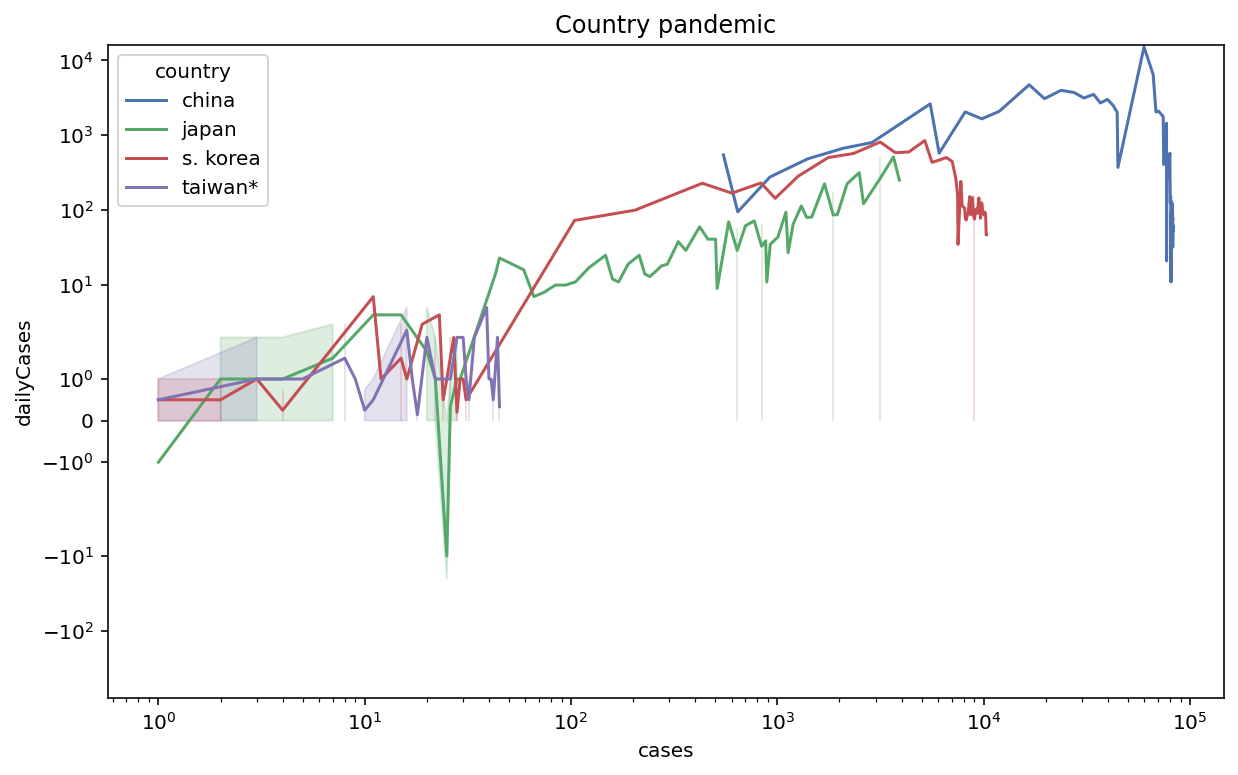

In [8]:
# Plot by countries
countries = ['china', 'japan', 'taiwan*', 's. korea']
dfSelect2 = df[df['country'].isin(countries)]

# Plot
plotCases(dfSelect2, 'Country pandemic', country = True)

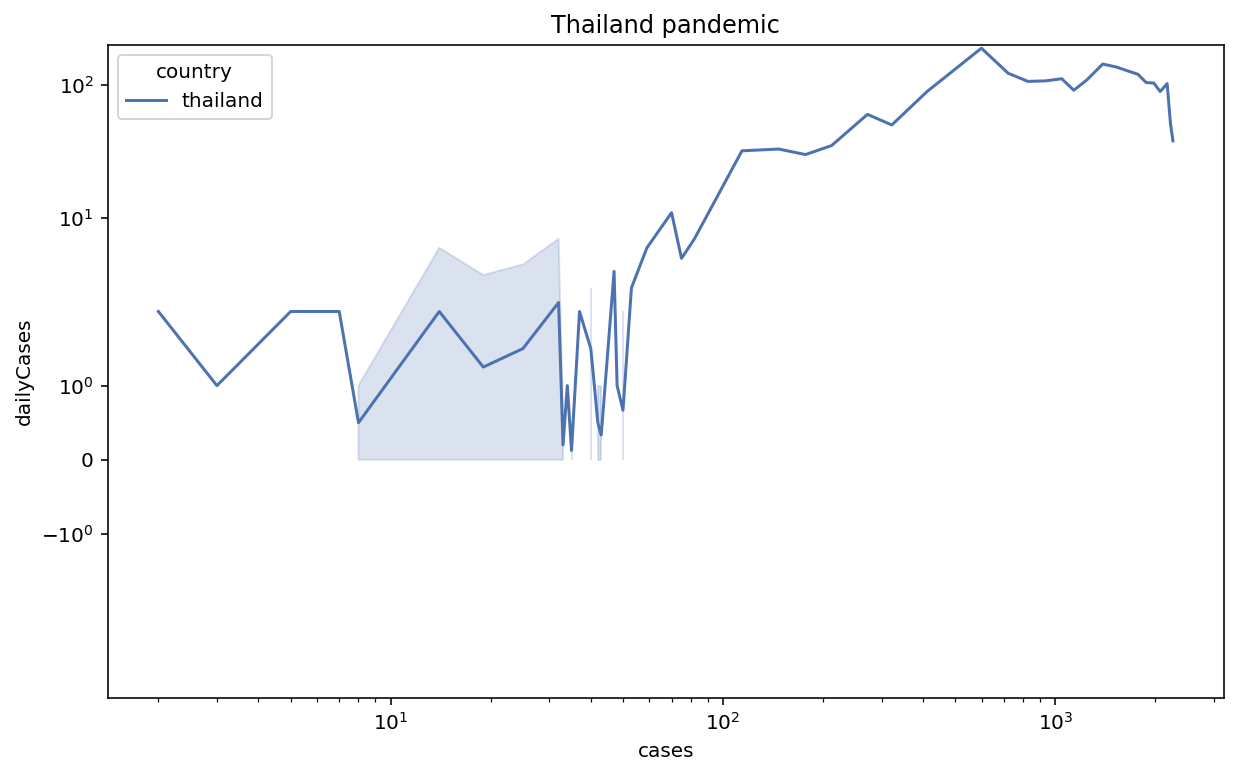

In [9]:
# Plot Thailand
countries = ['thailand']
dfSelect3 = df[df['country'].isin(countries)]

# Plot
plotCases(dfSelect3, 'Thailand pandemic', country = True)